In [16]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,recall_score
import warnings
warnings.filterwarnings("ignore")

In [7]:
df=pd.read_csv('data_encoded.csv')
df

,Unnamed: 0,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,0,41,1,1102,1,2,1,1,2,0,...,0,0,0,0,0,1,0,0,0,1
1,1,49,0,279,8,1,1,2,3,1,...,0,0,0,0,1,0,0,0,1,0
2,2,37,1,1373,2,2,1,4,4,1,...,1,0,0,0,0,0,0,0,0,1
3,3,33,0,1392,3,4,1,5,4,0,...,0,0,0,0,1,0,0,0,1,0
4,4,27,0,591,2,1,1,7,1,1,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1465,36,0,884,23,2,1,2061,3,1,...,1,0,0,0,0,0,0,0,1,0
1466,1466,39,0,613,6,1,1,2062,4,1,...,0,0,0,0,0,0,0,0,1,0
1467,1467,27,0,155,4,3,1,2064,2,1,...,0,0,1,0,0,0,0,0,1,0
1468,1468,49,0,1023,2,3,1,2065,4,1,...,0,0,0,0,0,1,0,0,1,0


In [8]:
df.drop('Unnamed: 0',inplace=True,axis=1)

In [10]:
df.nunique().reset_index().rename(columns={'index':'column',0:'unique count'})

,column,unique count
0,Age,43
1,Attrition,2
2,DailyRate,886
3,DistanceFromHome,29
4,Education,5
5,EmployeeCount,1
6,EmployeeNumber,1470
7,EnvironmentSatisfaction,4
8,Gender,2
9,HourlyRate,71


In [13]:
cat_cols = [col for col in df.columns if df[col].nunique() < 10]
num_cols = [col for col in df.columns if df[col].nunique() >= 10]

print(cat_cols)
print(num_cols)

['Attrition', 'Education', 'EmployeeCount', 'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'Over18', 'OverTime', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TrainingTimesLastYear', 'WorkLifeBalance', 'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely', 'Department_Human Resources', 'Department_Research & Development', 'Department_Sales', 'EducationField_Human Resources', 'EducationField_Life Sciences', 'EducationField_Marketing', 'EducationField_Medical', 'EducationField_Other', 'EducationField_Technical Degree', 'JobRole_Healthcare Representative', 'JobRole_Human Resources', 'JobRole_Laboratory Technician', 'JobRole_Manager', 'JobRole_Manufacturing Director', 'JobRole_Research Director', 'JobRole_Research Scientist', 'JobRole_Sales Executive', 'JobRole_Sales Representative', 'MaritalStatus_Divorced', 'MaritalStatus_Married', 'MaritalStatus_Single']
['Age', 'Dai

In [14]:
df[num_cols].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
MonthlyIncome,1470.0,6502.931293,4707.956783,1009.0,2911.00,4919.0,8379.00,19999.0
MonthlyRate,1470.0,14313.103401,7117.786044,2094.0,8047.00,14235.5,20461.50,26999.0
NumCompaniesWorked,1470.0,2.693197,2.498009,0.0,1.00,2.0,4.00,9.0
PercentSalaryHike,1470.0,15.209524,3.659938,11.0,12.00,14.0,18.00,25.0
TotalWorkingYears,1470.0,11.279592,7.780782,0.0,6.00,10.0,15.00,40.0


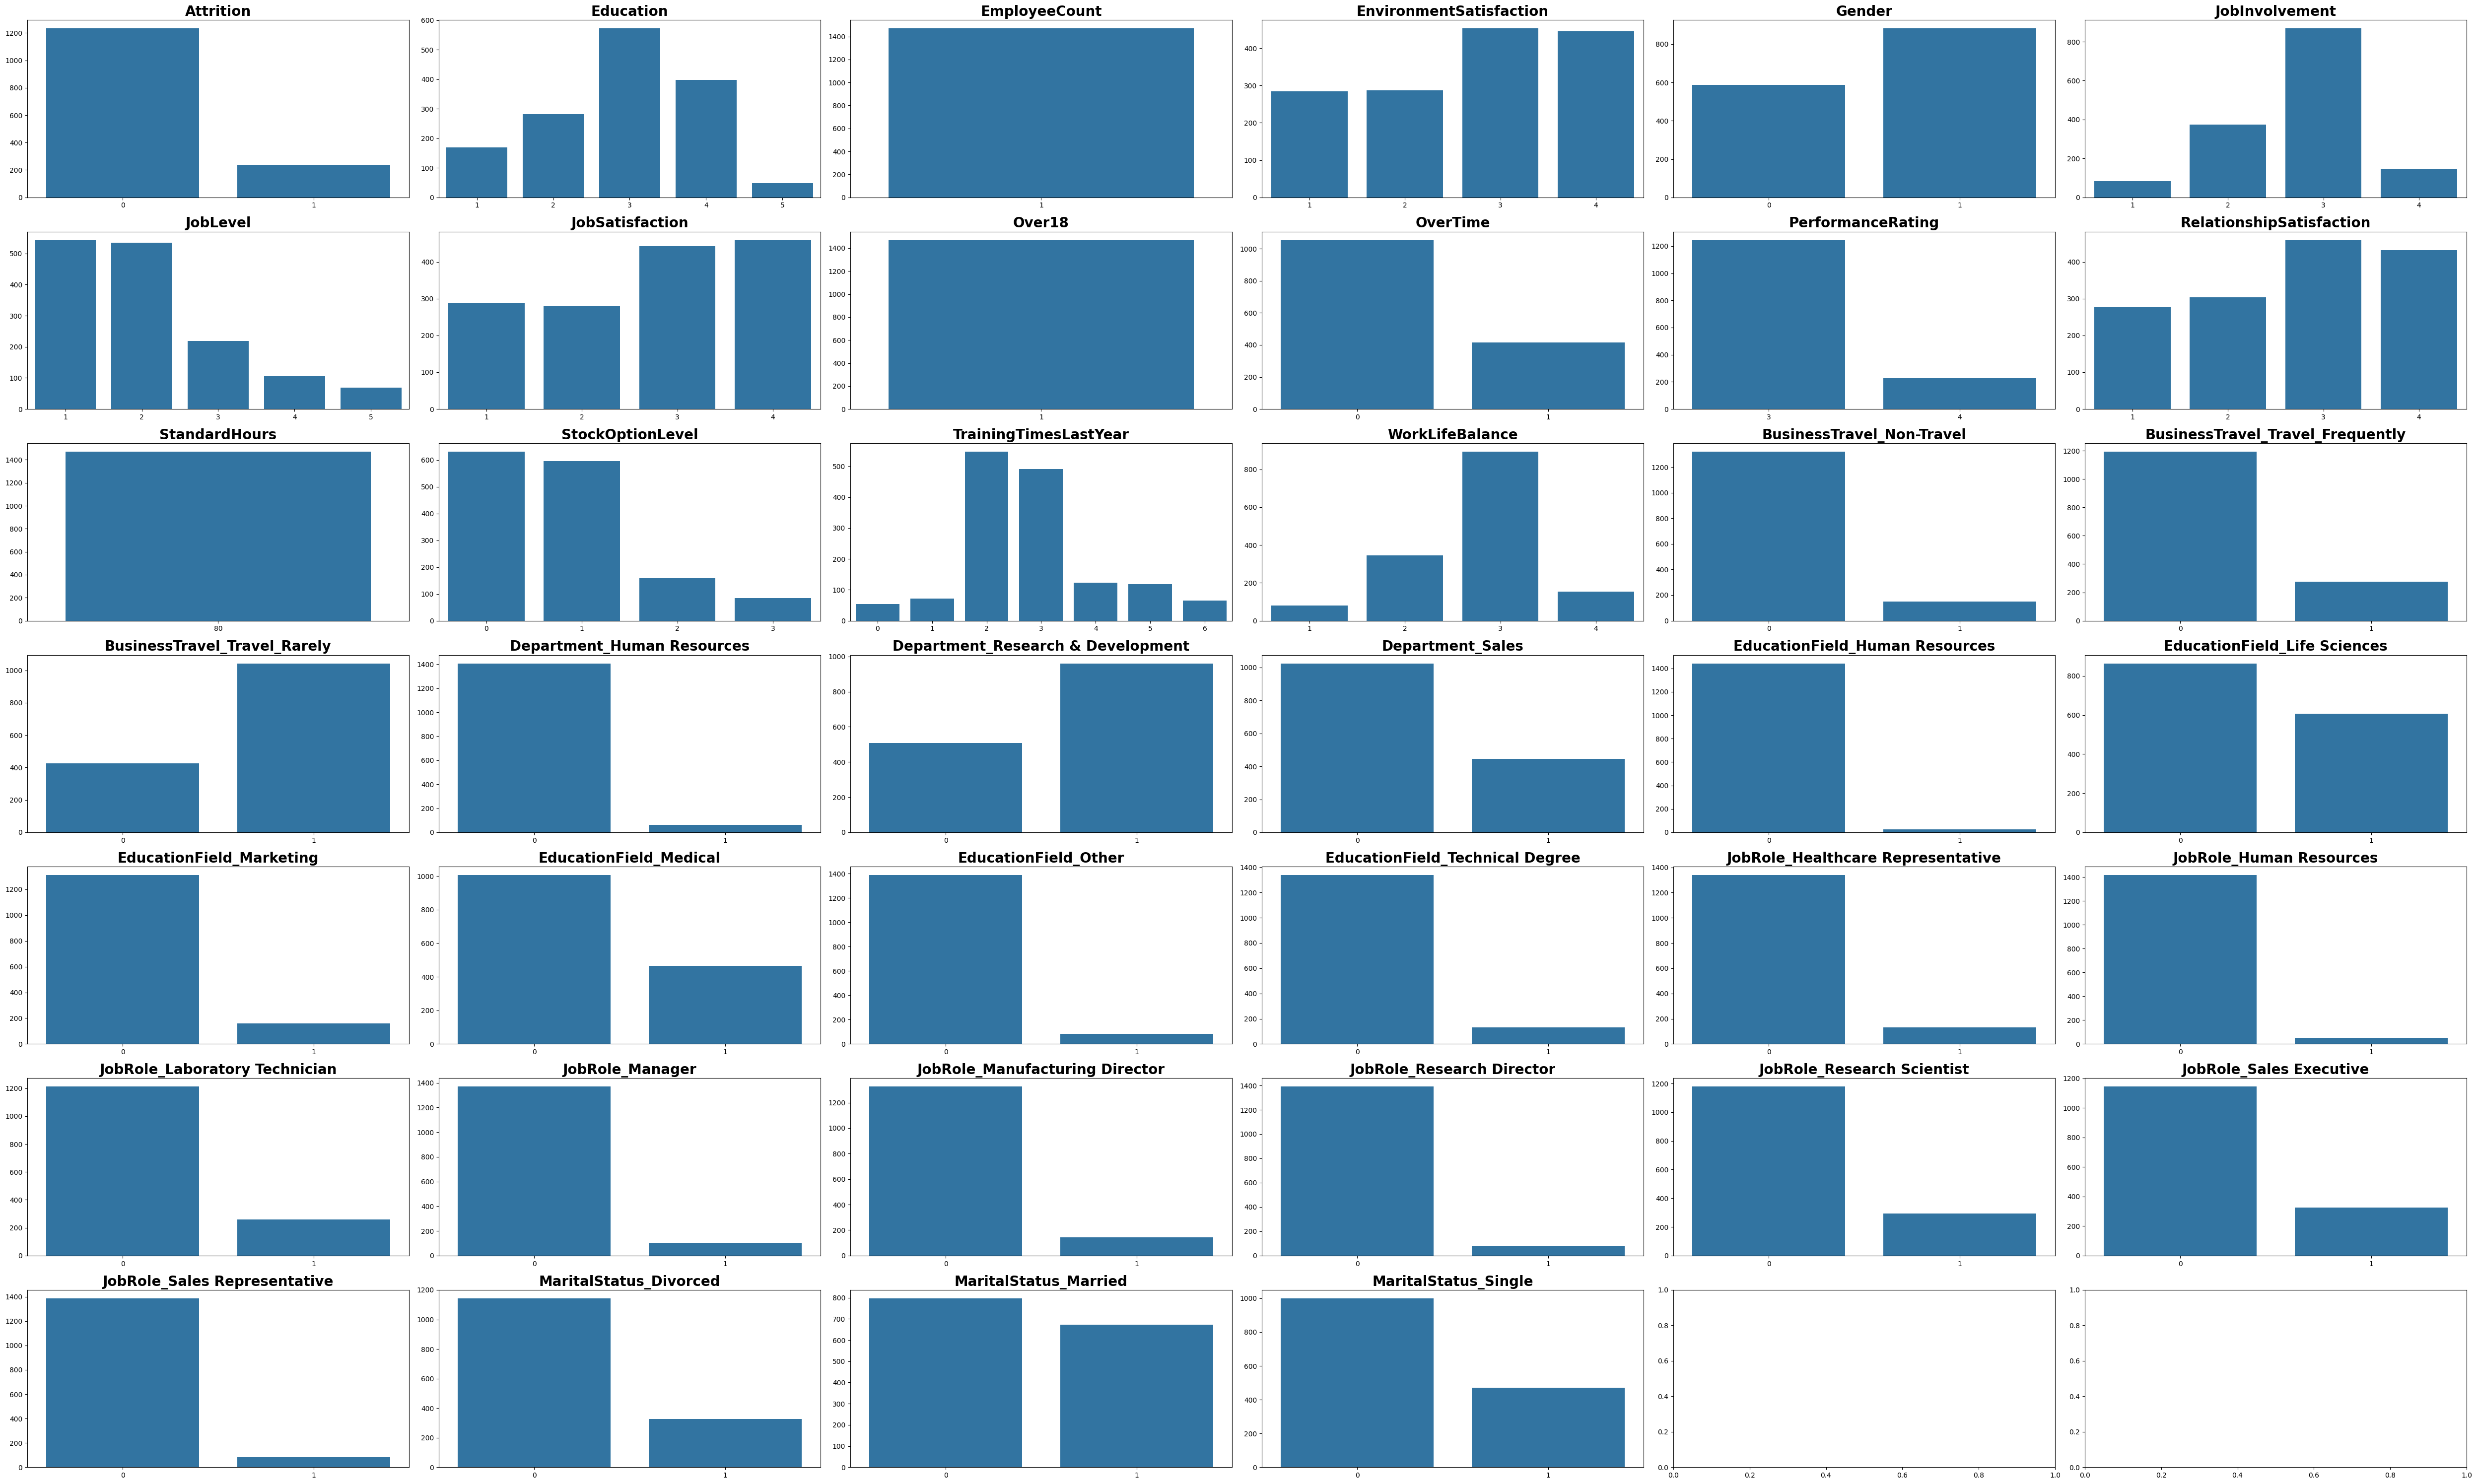

In [28]:
cat_cols=['Attrition', 'Education', 'EmployeeCount', 'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'Over18', 'OverTime', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TrainingTimesLastYear', 'WorkLifeBalance', 'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely', 'Department_Human Resources', 'Department_Research & Development', 'Department_Sales', 'EducationField_Human Resources', 'EducationField_Life Sciences', 'EducationField_Marketing', 'EducationField_Medical', 'EducationField_Other', 'EducationField_Technical Degree', 'JobRole_Healthcare Representative', 'JobRole_Human Resources', 'JobRole_Laboratory Technician', 'JobRole_Manager', 'JobRole_Manufacturing Director', 'JobRole_Research Director', 'JobRole_Research Scientist', 'JobRole_Sales Executive', 'JobRole_Sales Representative', 'MaritalStatus_Divorced', 'MaritalStatus_Married', 'MaritalStatus_Single']

fig,axes=plt.subplots(7,6,figsize=(50,30))
axes=axes.flatten()

for i, col in enumerate(cat_cols):
    sns.countplot(x=col, data=df , ax=axes[i])
    axes[i].set_title(col, fontsize=20, fontweight='bold')
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

plt.tight_layout()
plt.show()

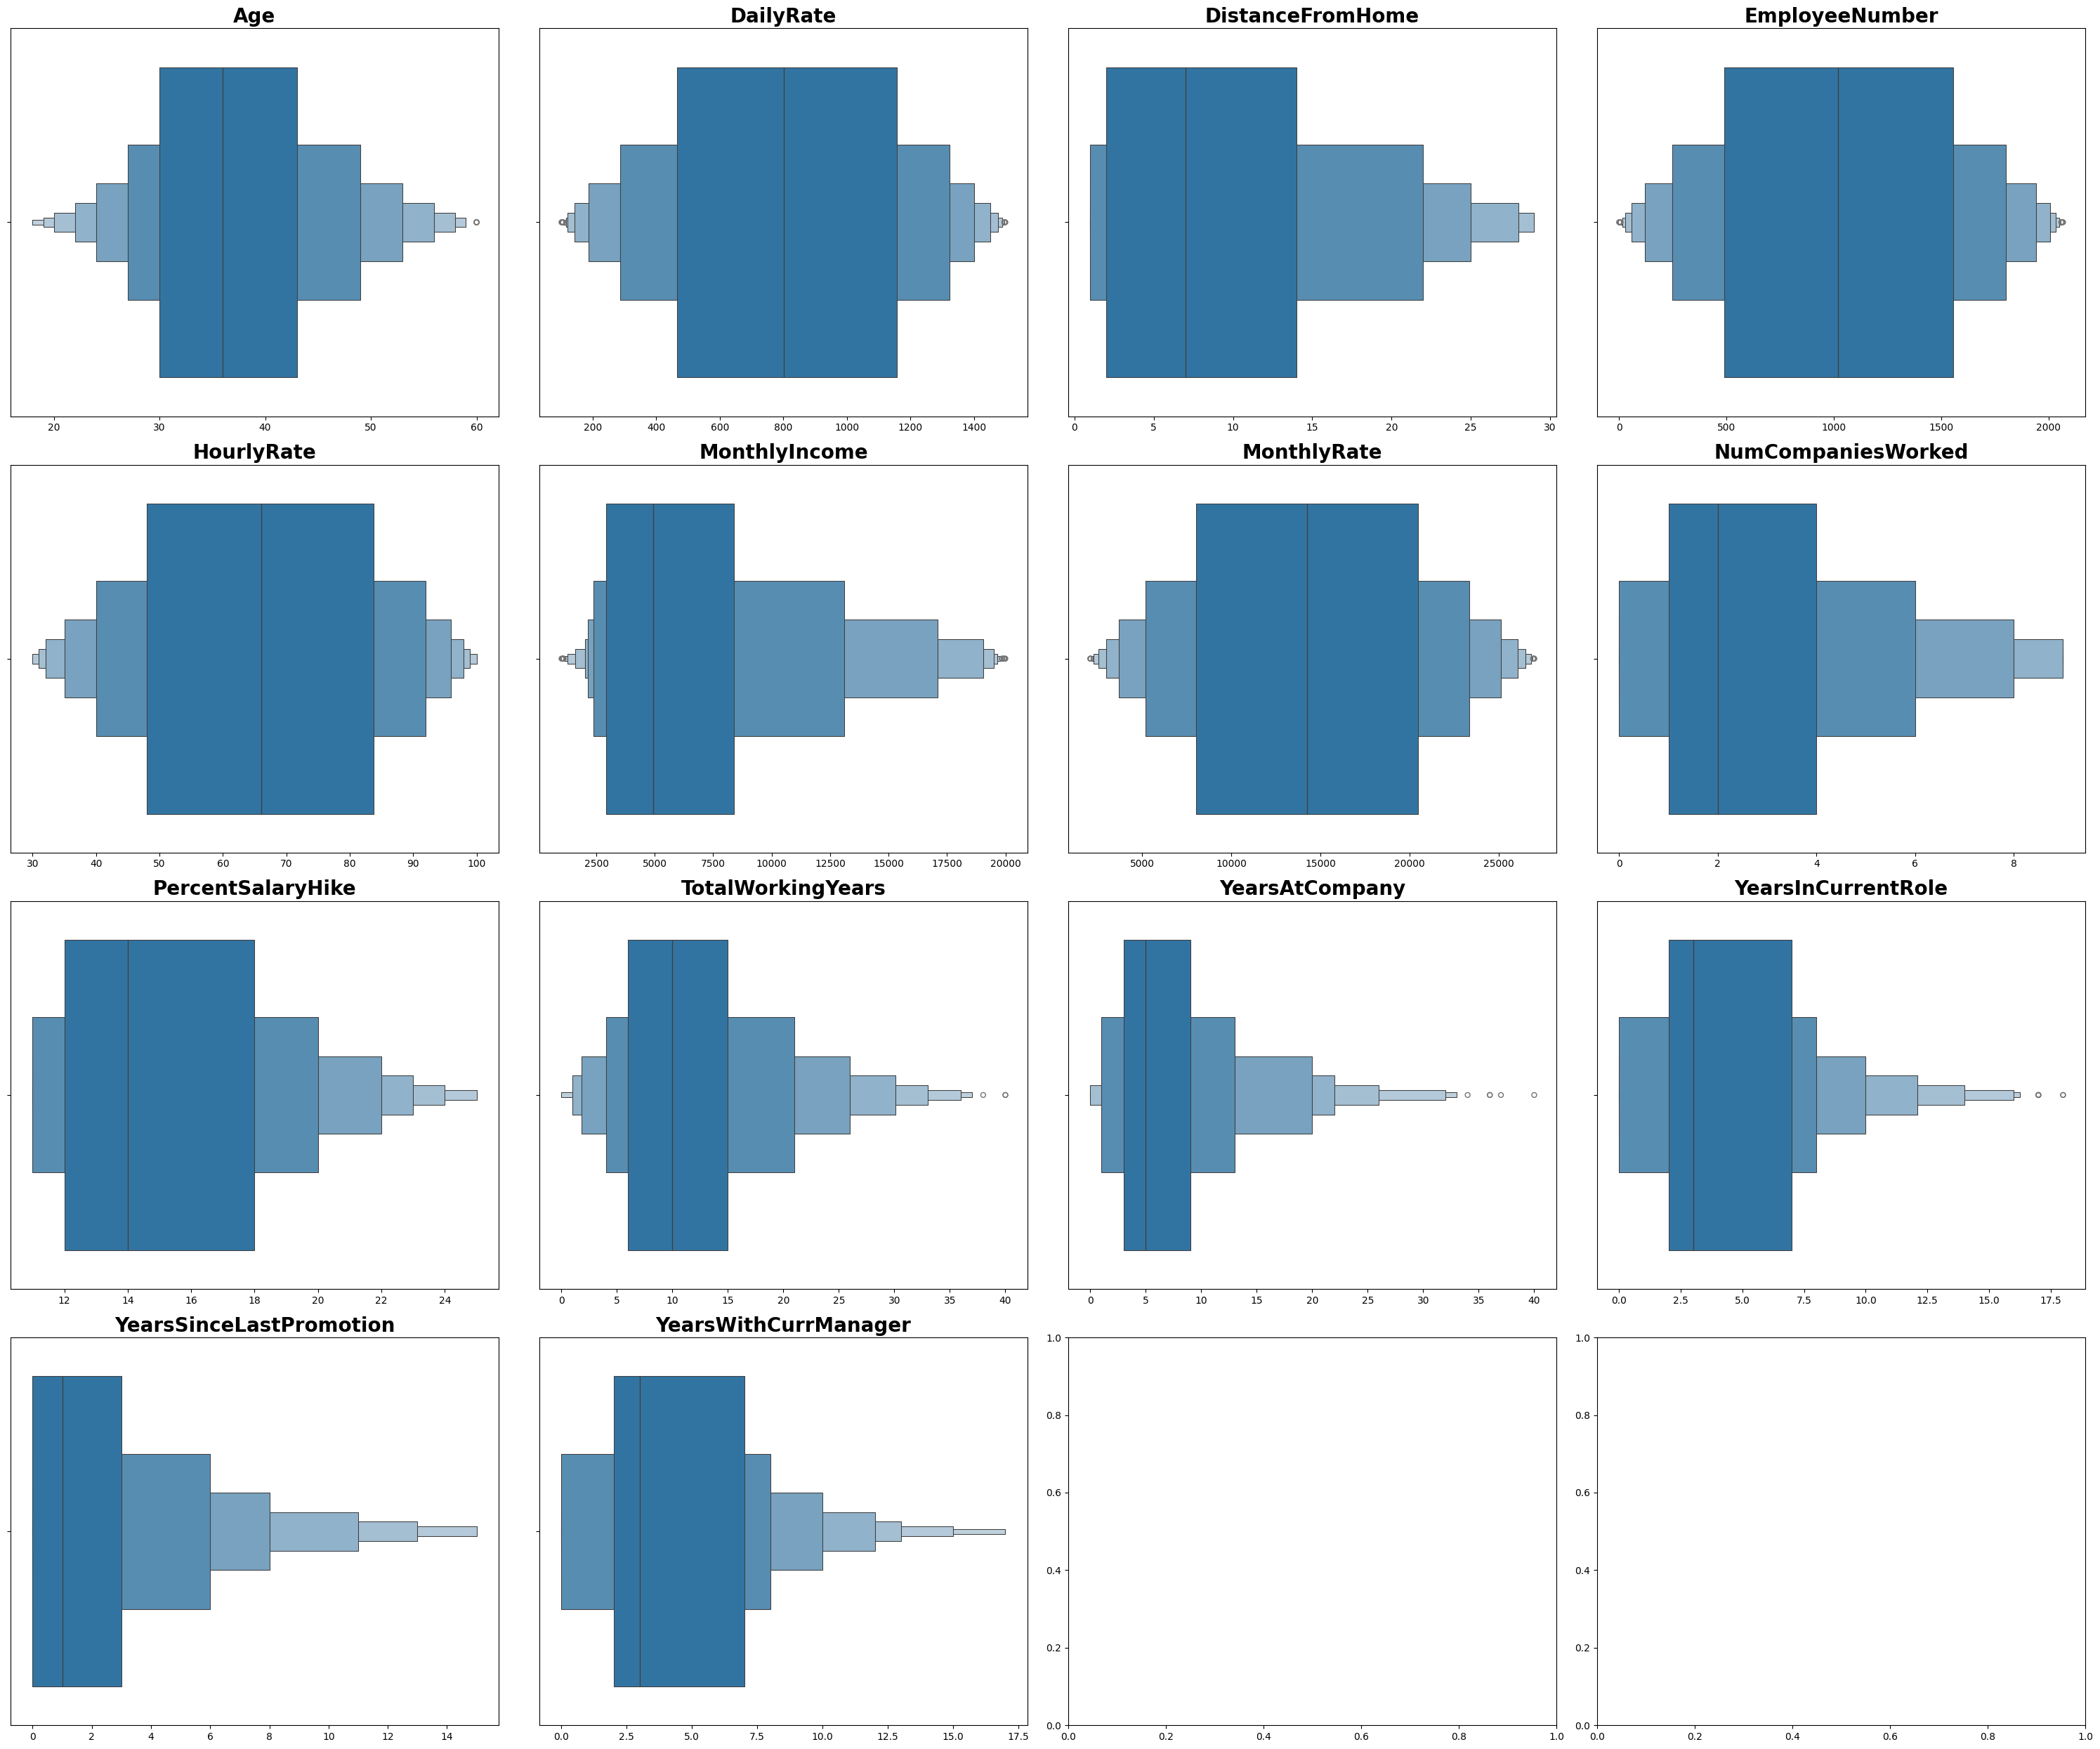

In [26]:
num_cols=['Age', 'DailyRate', 'DistanceFromHome', 'EmployeeNumber', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

fig, axes = plt.subplots(4,4, figsize=(30,25))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.boxenplot(x=col, data=df, ax=axes[i])
    axes[i].set_title(col, fontsize=20, fontweight='bold')
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

plt.tight_layout()
plt.show()

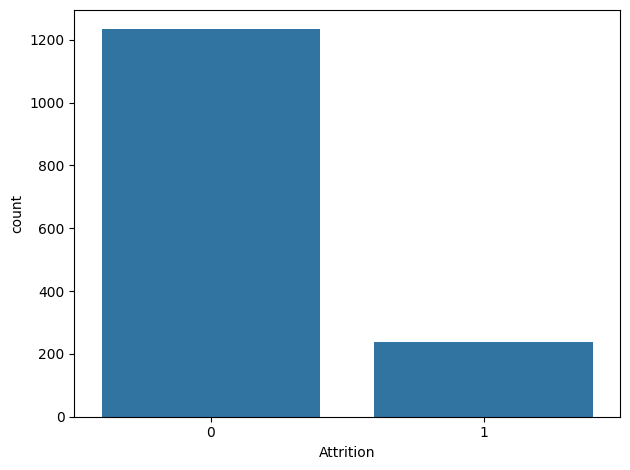

In [38]:
sns.countplot(x=df['Attrition'], data=df,)


plt.tight_layout()
plt.show()


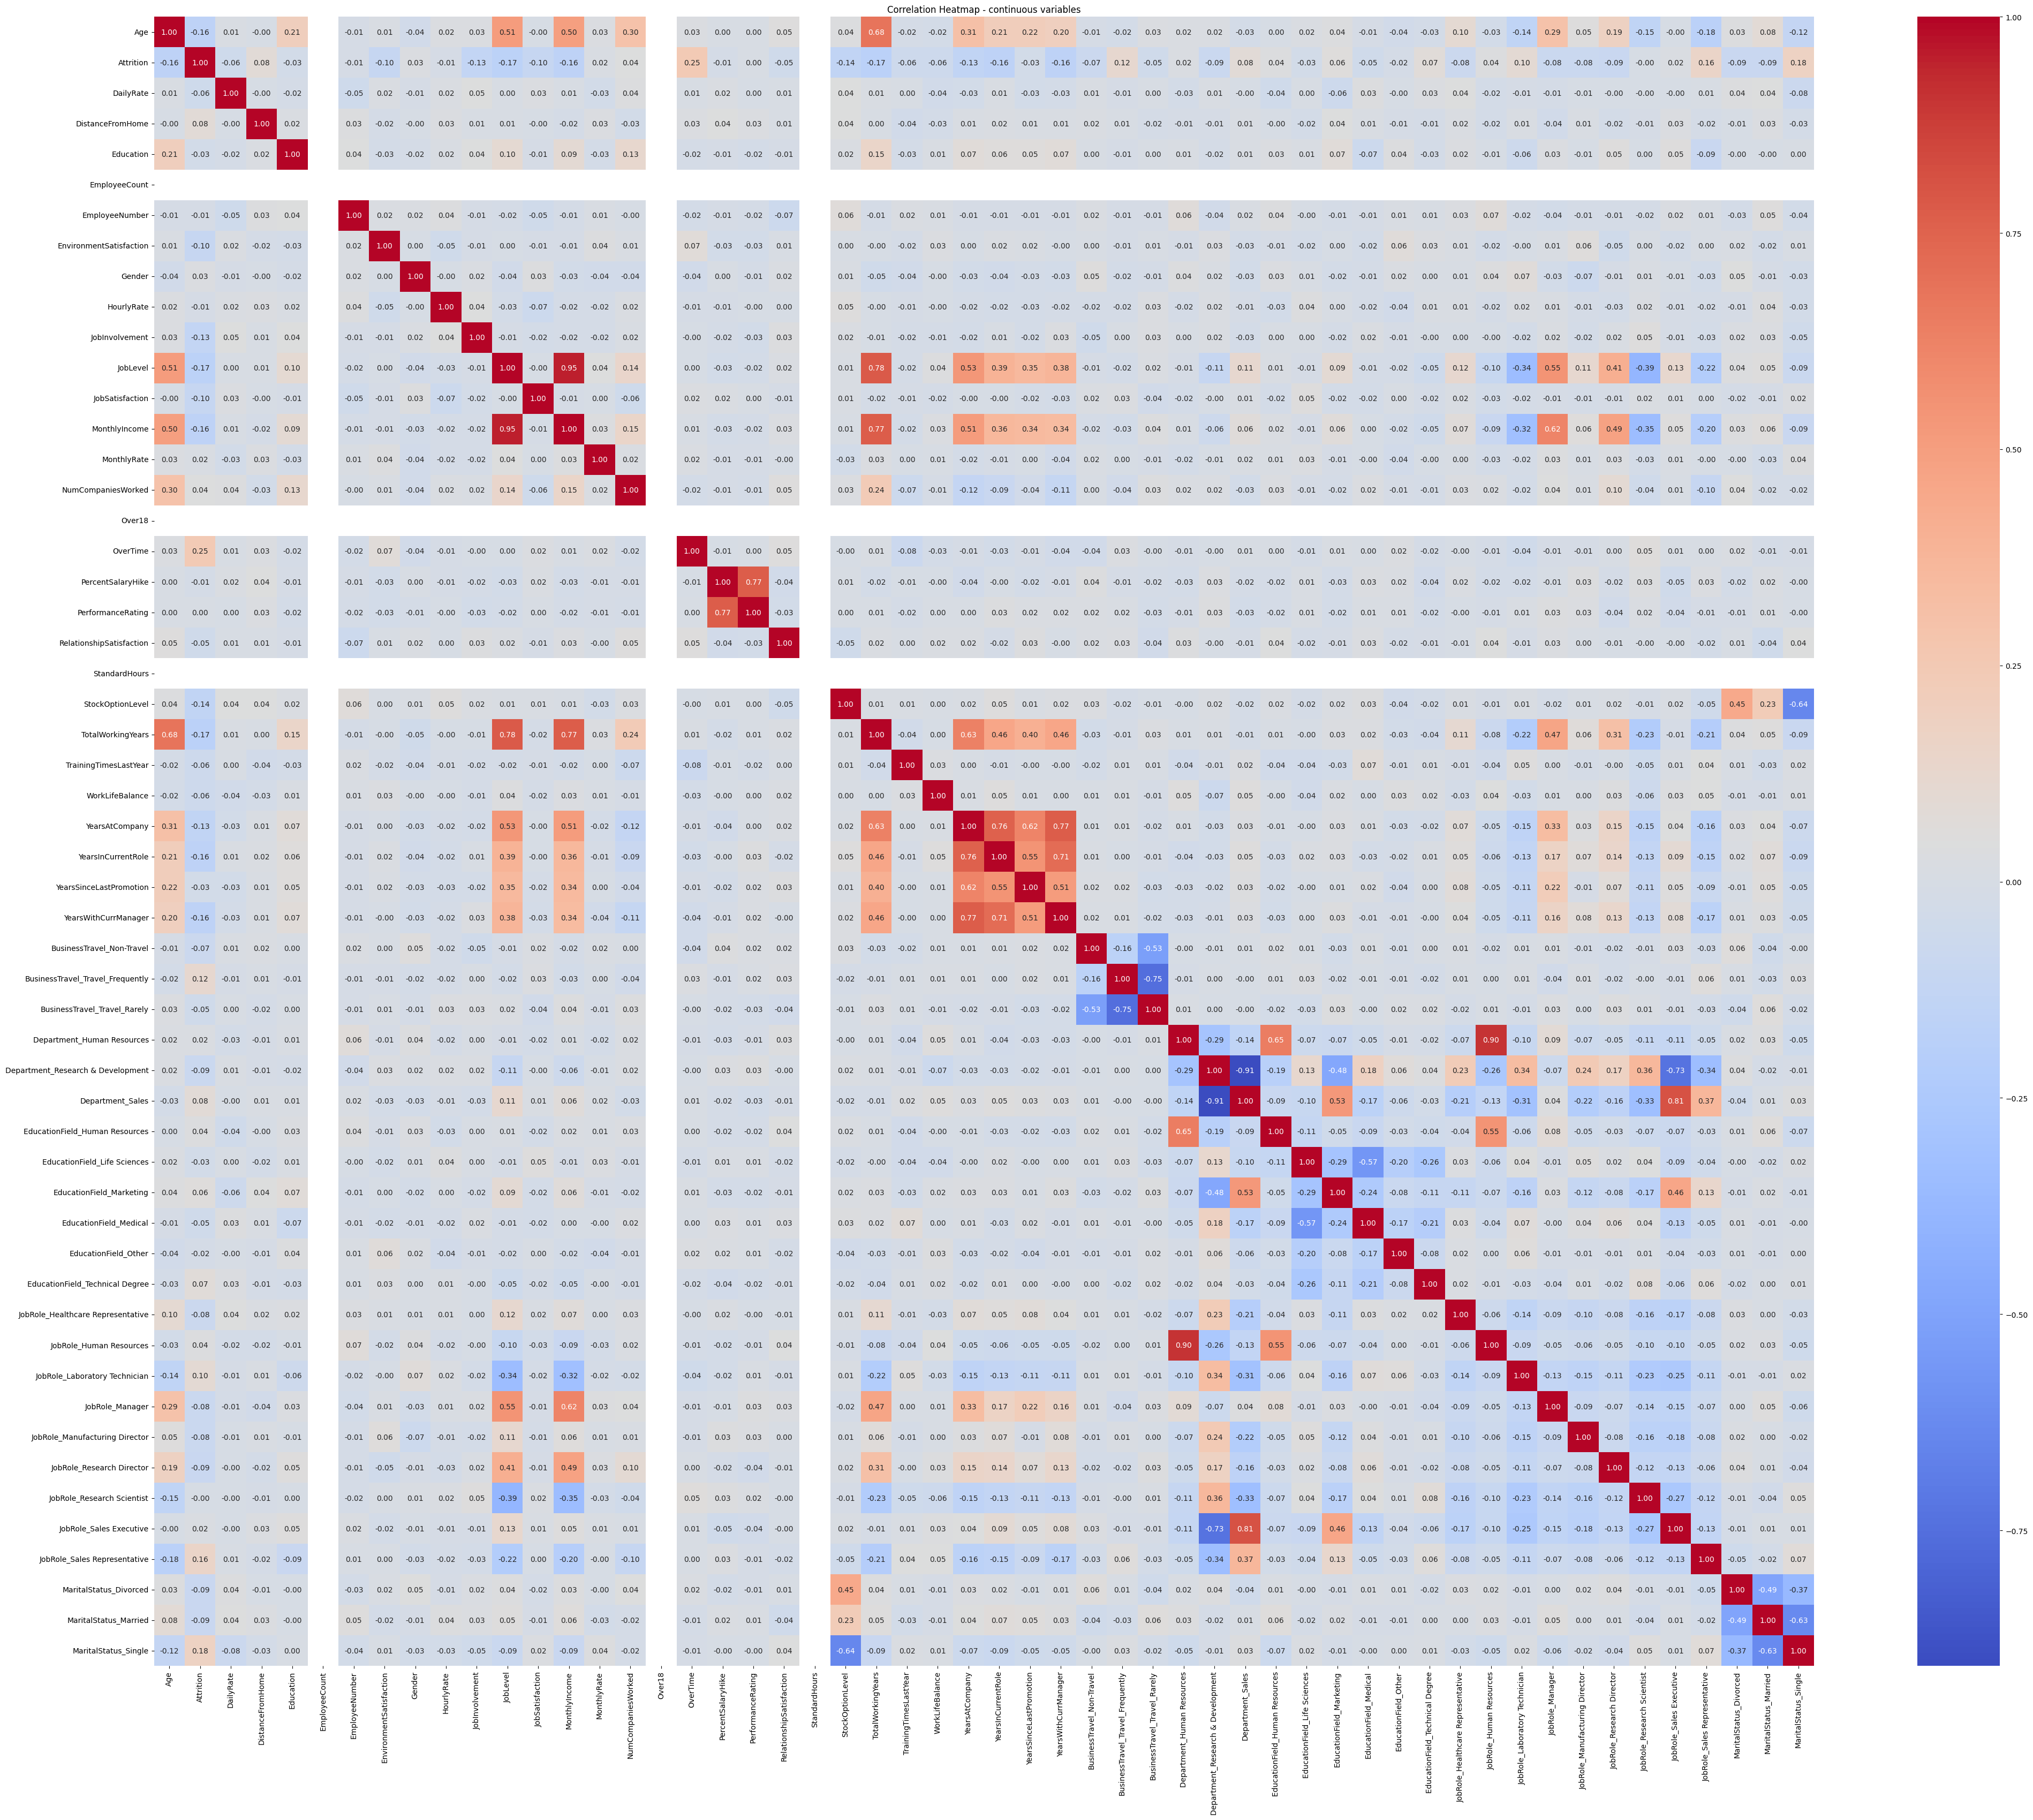

In [40]:
plt.figure(figsize=(50,40))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap - continuous variables")
plt.show()

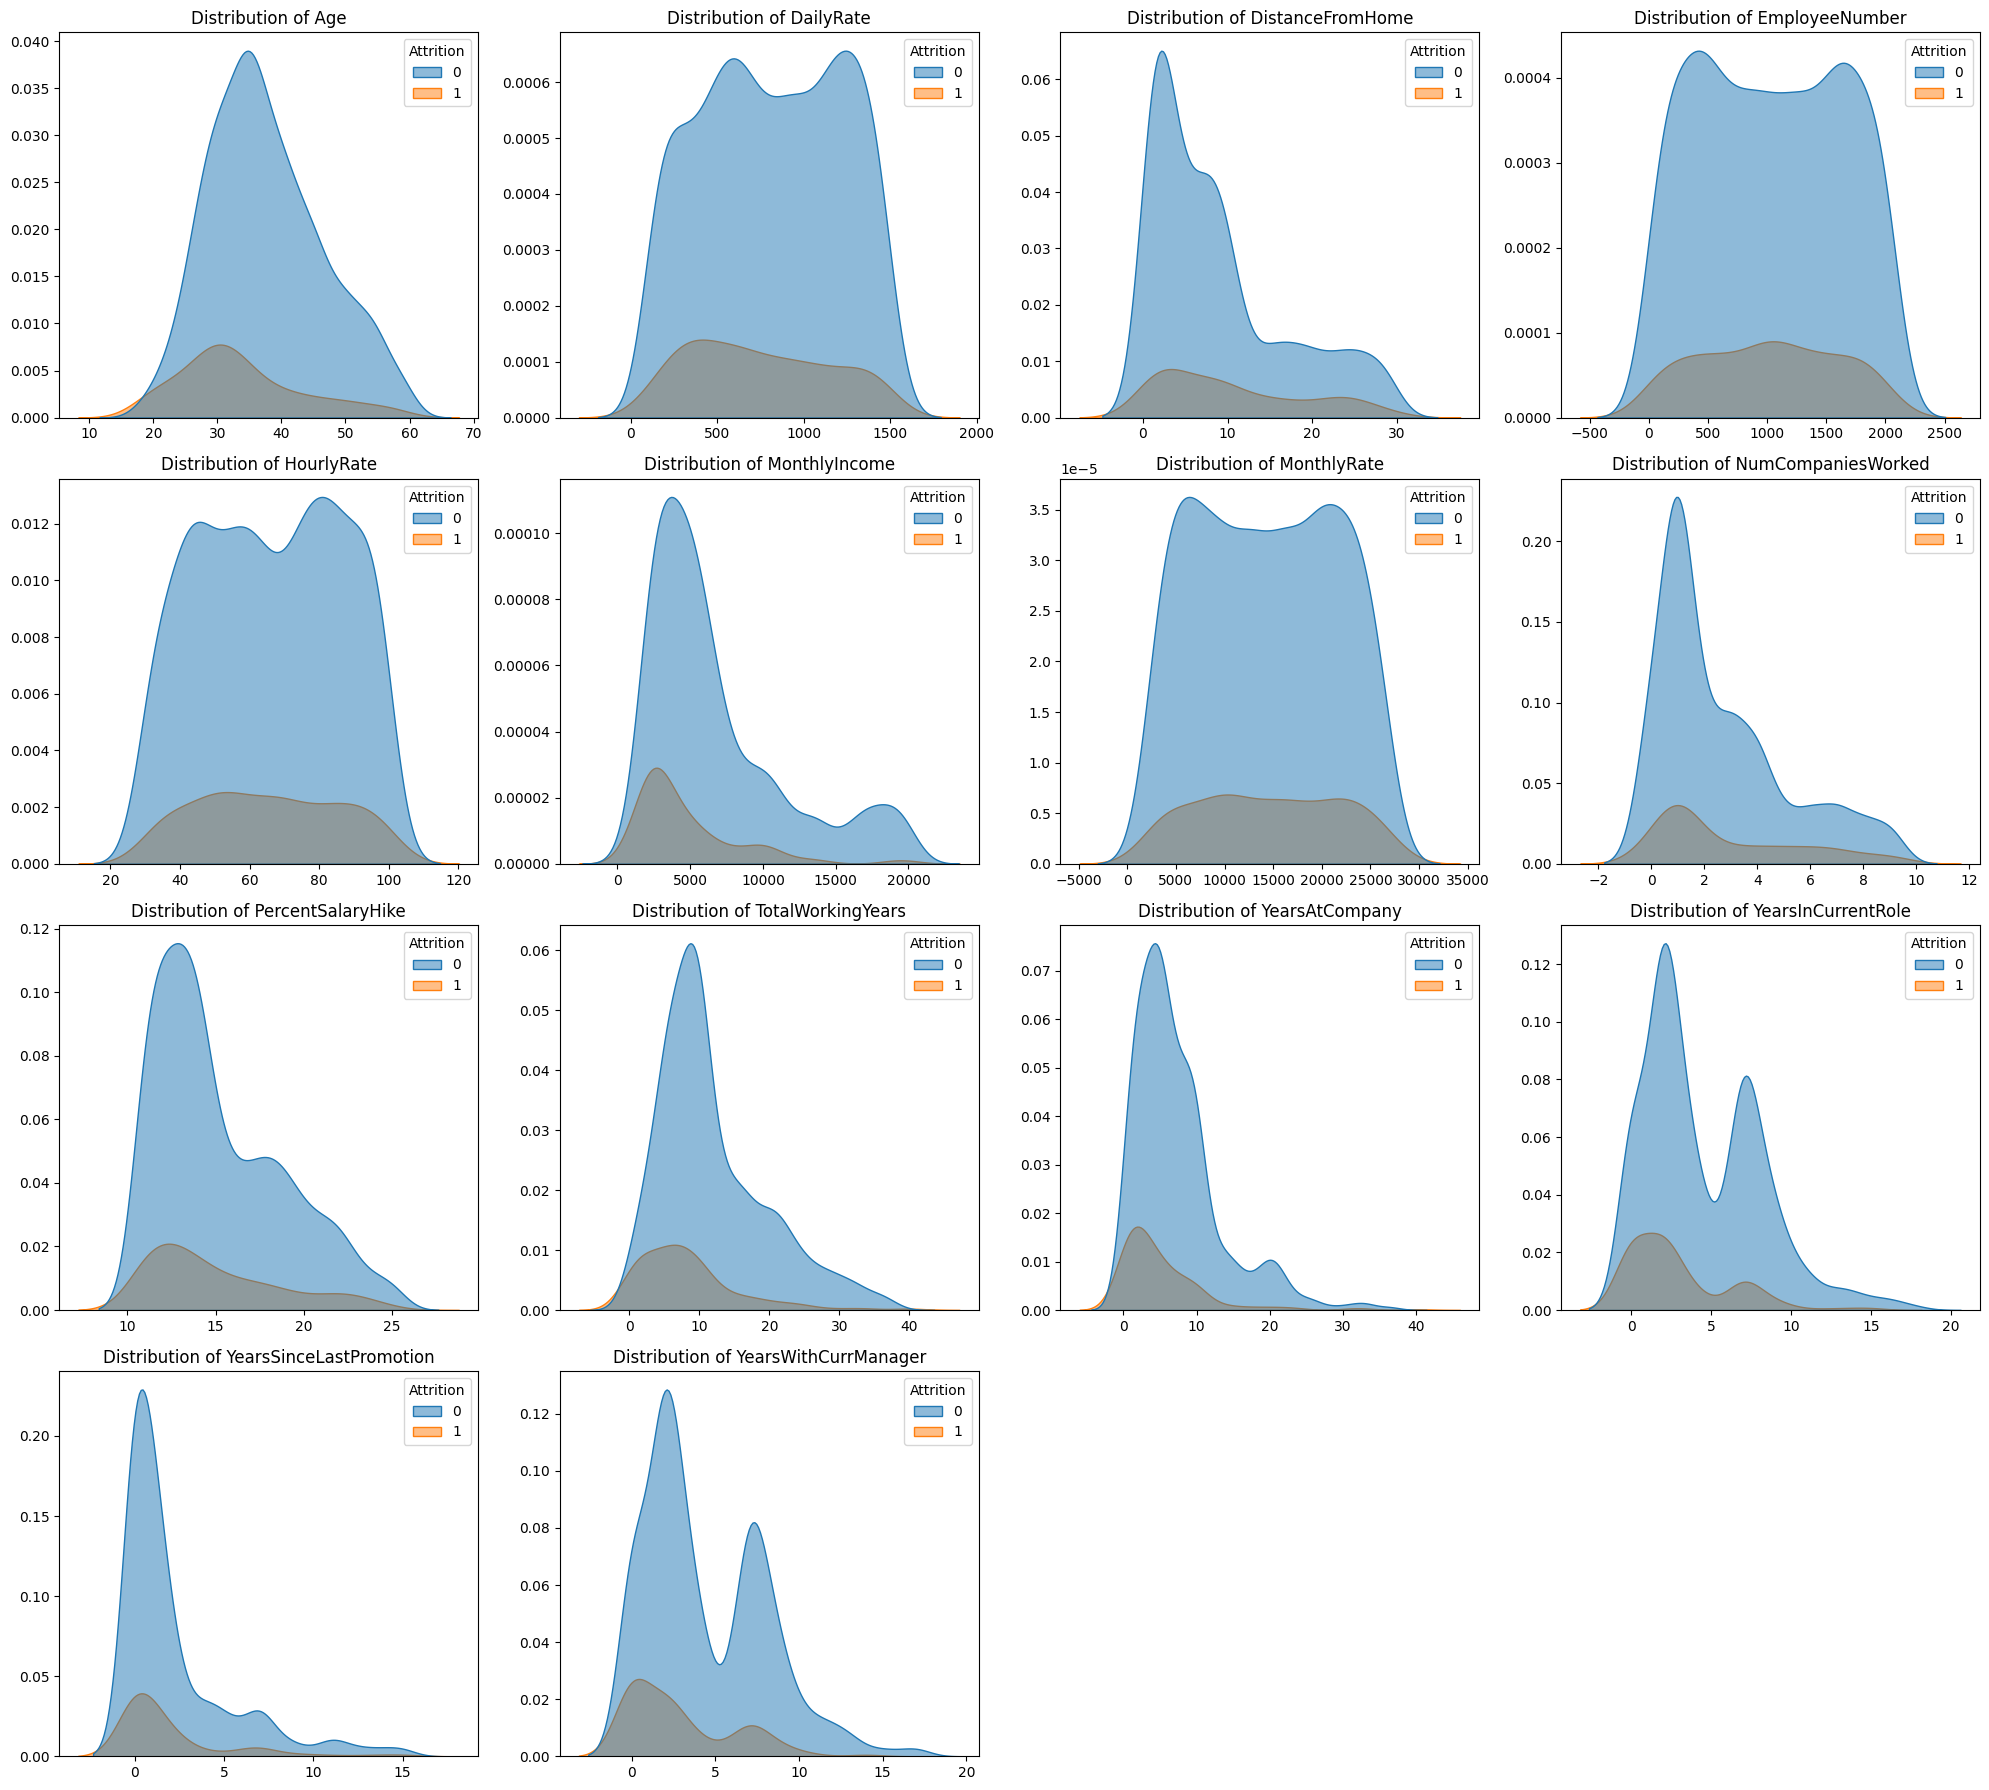

In [48]:
num_cols=['Age', 'DailyRate', 'DistanceFromHome', 'EmployeeNumber', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

plt.figure(figsize=(20,18))

for i,col in enumerate(num_cols):

    plt.subplot(4,4,i+1)
    sns.kdeplot(data=df, x=col, hue='Attrition', fill=True, alpha=0.5)
    plt.title(f"Distribution of {col}")
    plt.xlabel("")
    plt.ylabel("")

plt.tight_layout()
plt.show()


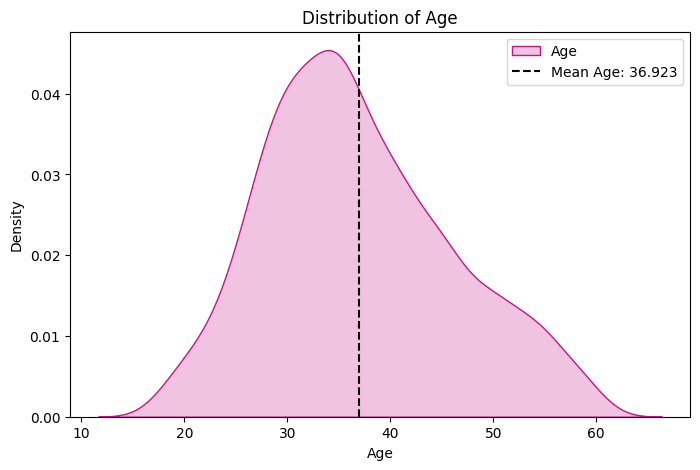

In [65]:
plt.figure(figsize=(8,5))
sns.kdeplot(x=df['Age'],color='MediumVioletRed',shade=True,label='Age')
plt.axvline(x=df['Age'].mean(),color='k',linestyle ="--",label='Mean Age: 36.923')
plt.legend()
plt.title('Distribution of Age')
plt.show()

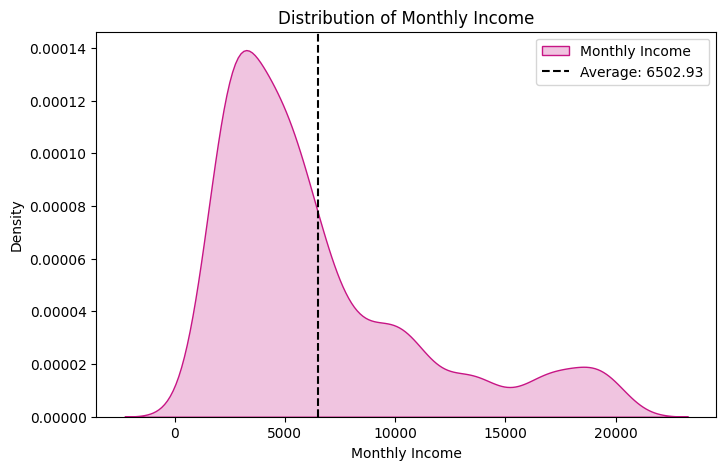

In [66]:

plt.figure(figsize=(8,5))
sns.kdeplot(x=df['MonthlyIncome'],color='MediumVioletRed',shade=True,label='Monthly Income')
plt.axvline(x=df['MonthlyIncome'].mean(),color='k',linestyle ="--",label='Average: 6502.93')
plt.xlabel('Monthly Income')
plt.legend()
plt.title('Distribution of Monthly Income')
plt.show()

In [52]:
# ============================================
# 💡 Logistic Regression Model (Scikit-learn)
# ============================================

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, recall_score
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

# ===============================
# 📂 1️⃣ Load Dataset
# ===============================
df = pd.read_csv("data_encoded.csv")  # change to your dataset name
target_col = "Attrition"  # heart attack column (1=Yes, 2=No)

X = df.drop(columns=[target_col])
y = df[target_col]



num_cols=['Age', 'DailyRate', 'DistanceFromHome', 'EmployeeNumber', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols)
    ],
    remainder='passthrough'
)

# ===============================
# ✂️ 3️⃣ Split and Balance
# ===============================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

X_train_scaled = preprocessor.fit_transform(X_train)
X_test_scaled = preprocessor.transform(X_test)

# Handle class imbalance
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train_scaled, y_train)

# ===============================
# 🤖 4️⃣ Logistic Regression
# ===============================
log_reg = LogisticRegression(max_iter=500000, class_weight='balanced', random_state=42)
log_reg.fit(X_res, y_res)

# ===============================
# 📊 5️⃣ Evaluation
# ===============================
y_pred = log_reg.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"✅ Accuracy: {accuracy*100:.2f}%")
print(f"📈 Recall: {recall*100:.2f}%\n")
print("📋 Classification Report:\n", classification_report(y_test, y_pred))


✅ Accuracy: 76.53%
📈 Recall: 61.70%

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.79      0.85       247
           1       0.36      0.62      0.46        47

    accuracy                           0.77       294
   macro avg       0.64      0.71      0.65       294
weighted avg       0.83      0.77      0.79       294



In [64]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import classification_report, roc_auc_score, recall_score, accuracy_score,precision_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np

# ===============================
#  Device
# ===============================
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("Using device:", device)

# ===============================
#  FOCAL LOSS
# ===============================
class FocalLoss(nn.Module):
    def __init__(self, alpha=3, gamma=3, reduction='mean'):
        super(FocalLoss, self).__init__()
        self.alpha = alpha
        self.gamma = gamma
        self.reduction = reduction
        self.ce = nn.CrossEntropyLoss(reduction='none')

    def forward(self, inputs, targets):
        ce_loss = self.ce(inputs, targets)
        pt = torch.exp(-ce_loss)
        focal_loss = self.alpha * (1 - pt) ** self.gamma * ce_loss
        return focal_loss.mean() if self.reduction == 'mean' else focal_loss

# ===============================
#  Train-Test Split + Scaling + SMOTE

# ===============================

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


sm = SMOTE(sampling_strategy=0.5, random_state=42)  # or their chosen ratio
X_sm, y_sm = sm.fit_resample(X_scaled, y)



X_train, X_test, y_train, y_test = train_test_split(
    X_sm, y_sm, test_size=0.2, random_state=42, stratify=y_sm
)




# ===============================
#  Tensors
# ===============================
X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train, dtype=torch.long).to(device)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(y_test.to_numpy(), dtype=torch.long).to(device)

# ===============================
#  Model Architecture
# ===============================
class ImprovedMLP_Recall(nn.Module):
    def __init__(self, input_dim):
        super(ImprovedMLP_Recall, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Linear(input_dim, 512),
            nn.BatchNorm1d(512),
            nn.LeakyReLU(0.1),
            nn.Dropout(0.3)
        )
        self.layer2 = nn.Sequential(
            nn.Linear(512, 256),
            nn.BatchNorm1d(256),
            nn.LeakyReLU(0.1),
            nn.Dropout(0.25)
        )
        self.layer3 = nn.Sequential(
            nn.Linear(256, 128),
            nn.BatchNorm1d(128),
            nn.LeakyReLU(0.1),
            nn.Dropout(0.2)
        )
        self.layer4 = nn.Sequential(
            nn.Linear(128, 64),
            nn.LeakyReLU(0.1),
            nn.Dropout(0.15)
        )
        self.output = nn.Linear(64, 2)

    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        return self.output(x)

# ===============================
# Loss + Optimizer + Scheduler
# ===============================
model = ImprovedMLP_Recall(X_train.shape[1]).to(device)
criterion = FocalLoss(alpha=2.5, gamma=2)
optimizer = optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-5)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.9)

# ===============================
#  Training Loop with Early Stopping
# ===============================
best_loss = float('inf')
patience = 5
trigger = 0
epochs = 300

for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()
    scheduler.step()  # ✅ no argument here

    print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")

    if loss.item() < best_loss:
        best_loss = loss.item()
        torch.save(model.state_dict(), "best_model.pt")
        trigger = 0
    else:
        trigger += 1
        if trigger >= patience:
            print("Early stopping triggered!")
            break

# ===============================
#  Evaluation + Threshold Tuning
# ===============================
model.load_state_dict(torch.load("best_model.pt"))
model.eval()
with torch.no_grad():
    logits = model(X_test_tensor)
    probs = torch.softmax(logits, dim=1)[:,1].cpu().numpy()

from sklearn.metrics import fbeta_score

threshold = 0.3

y_test_np = y_test_tensor.cpu().numpy()     # <--- important
final_preds = (probs > threshold).astype(int)

print(classification_report(y_test_np, final_preds, digits=3))
print("ROC-AUC:", roc_auc_score(y_test_np, probs))
print("Recall:", recall_score(y_test_np, final_preds))
print("Precision:", precision_score(y_test_np, final_preds))
print("Accuracy:", accuracy_score(y_test_np, final_preds))

Using device: cuda
Epoch 1/300, Loss: 0.5160
Epoch 2/300, Loss: 0.4052
Epoch 3/300, Loss: 0.3554
Epoch 4/300, Loss: 0.3211
Epoch 5/300, Loss: 0.3024
Epoch 6/300, Loss: 0.2908
Epoch 7/300, Loss: 0.2775
Epoch 8/300, Loss: 0.2736
Epoch 9/300, Loss: 0.2514
Epoch 10/300, Loss: 0.2461
Epoch 11/300, Loss: 0.2370
Epoch 12/300, Loss: 0.2298
Epoch 13/300, Loss: 0.2228
Epoch 14/300, Loss: 0.2086
Epoch 15/300, Loss: 0.2082
Epoch 16/300, Loss: 0.1971
Epoch 17/300, Loss: 0.1965
Epoch 18/300, Loss: 0.1853
Epoch 19/300, Loss: 0.1922
Epoch 20/300, Loss: 0.1739
Epoch 21/300, Loss: 0.1722
Epoch 22/300, Loss: 0.1718
Epoch 23/300, Loss: 0.1614
Epoch 24/300, Loss: 0.1618
Epoch 25/300, Loss: 0.1570
Epoch 26/300, Loss: 0.1502
Epoch 27/300, Loss: 0.1424
Epoch 28/300, Loss: 0.1412
Epoch 29/300, Loss: 0.1360
Epoch 30/300, Loss: 0.1324
Epoch 31/300, Loss: 0.1213
Epoch 32/300, Loss: 0.1214
Epoch 33/300, Loss: 0.1181
Epoch 34/300, Loss: 0.1196
Epoch 35/300, Loss: 0.1140
Epoch 36/300, Loss: 0.1159
Epoch 37/300, Loss

In [63]:
for t in [0.10,0.15,0.20,0.25,0.30,0.5,0.4,0.35,0.33,0.37]:
    y_pred_t = (probs > t).astype(int)
    p = precision_score(y_test, y_pred_t)
    r = recall_score(y_test, y_pred_t)
    a = accuracy_score(y_test,y_pred_t)
    print("threshold", t , "precision:", p, " recall:",r, "Accuracy:",a)

threshold 0.1 precision: 0.5327510917030568  recall: 0.991869918699187 Accuracy: 0.7081081081081081
threshold 0.15 precision: 0.5654205607476636  recall: 0.983739837398374 Accuracy: 0.7432432432432432
threshold 0.2 precision: 0.616580310880829  recall: 0.967479674796748 Accuracy: 0.7891891891891892
threshold 0.25 precision: 0.6574585635359116  recall: 0.967479674796748 Accuracy: 0.8216216216216217
threshold 0.3 precision: 0.6918604651162791  recall: 0.967479674796748 Accuracy: 0.845945945945946
threshold 0.5 precision: 0.7898550724637681  recall: 0.8861788617886179 Accuracy: 0.8837837837837837
threshold 0.4 precision: 0.7516339869281046  recall: 0.9349593495934959 Accuracy: 0.8756756756756757
threshold 0.35 precision: 0.725  recall: 0.943089430894309 Accuracy: 0.8621621621621621
threshold 0.33 precision: 0.703030303030303  recall: 0.943089430894309 Accuracy: 0.8486486486486486
threshold 0.37 precision: 0.7388535031847133  recall: 0.943089430894309 Accuracy: 0.8702702702702703
